<a href="https://colab.research.google.com/github/RMDircio/DS-Unit-4-Sprint-2-Neural-Networks/blob/main/module3-Intro-to-Keras/Regina_Dircio_DSPT5_433_Keras_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignment 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- ~~The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook.~~ 
- ~~Normalize the data (all features should have roughly the same scale)~~
- ~~Import the type of model and layers that you will need from Keras.~~
- ~~Instantiate a model object and use `model.add()` to add layers to your model~~
- ~~Since this is a regression model you will have a single output node in the final layer.~~
- ~~Use activation functions that are appropriate for this task~~
- ~~Compile your model~~
- ~~Fit your model and report its accuracy in terms of Mean Squared Error~~
- ~~Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch.~~
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [17]:
from tensorflow.keras.datasets import boston_housing
import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import  Dense

In [26]:
'''
gets pickel of logfile at each epoch end to directory for visualizations
'''
%load_ext tensorboard

import os
import datetime
import tensorflow as tf

# logs model info about each run/epoch and timestamps
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S")) 

# callback will take info from model,
# display via terminal or other medium - goes into fit statement
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
# from sklearn.datasets import load_boston
# boston = load_boston()
# print(boston.data.shape)

In [13]:
# load data
# boston = tensorflow.keras.datasets.boston_housing.load_data(path='boston_housing.npz')
# (X_train, y_train), (X_test, y_test) = boston
# X_train.shape, y_train.shape, X_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [22]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [23]:
# normalize
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)



In [ ]:
# Important Hyperparameters
inputs = x_train.shape[1]
epochs = 75
batch_size = 10


# Create Model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(inputs,)))
model.add(Dense(64, activation='relu')), # ADD LAYER
model.add(Dense(64, activation='relu'))
model.add(Dense(1)) # no activation function -> linear model, we want the outputs of the last equation

# Compile Model
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

# Fit Model
model.fit(x_train, y_train, 
          validation_data=(x_test,y_test), 
          epochs=epochs, 
          batch_size=batch_size
         )

In [ ]:
# look at results
%tensorboard --logdir logs

In [ ]:
# linear regression 

# logs model info about each run/epoch and timestamps
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S")) 

# callback will take info from model,
# display via terminal or other medium - goes into fit statement
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

# Important Hyperparameters
inputs = x_train.shape[1]
epochs = 75
batch_size = 10


# Create Model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(inputs,)))
model.add(Dense(64, activation='relu')), # ADD LAYER
model.add(Dense(64, activation='softmax'))
model.add(Dense(1)) # no activation function -> linear model, we want the outputs of the last equation

# Compile Model
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

# Fit Model
model.fit(x_train, y_train, 
          validation_data=(x_test,y_test), 
          epochs=epochs, 
          batch_size=batch_size,
          verbose=2
         )

In [33]:
# extra hidden layers

# logs model info about each run/epoch and timestamps
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S")) 

# callback will take info from model,
# display via terminal or other medium - goes into fit statement
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

# Important Hyperparameters
inputs = x_train.shape[1]
epochs = 75
batch_size = 10


# Create Model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(inputs,)))
model.add(Dense(64, activation='relu')), # ADD LAYER
model.add(Dense(64, activation='relu')), # ADD LAYER
model.add(Dense(64, activation='relu')), # ADD LAYER
model.add(Dense(64, activation='relu')), # ADD LAYER
model.add(Dense(64, activation='relu')), # ADD LAYER
model.add(Dense(64, activation='softmax'))
model.add(Dense(1)) # no activation function -> linear model, we want the outputs of the last equation

# Compile Model
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

# Fit Model
model.fit(x_train, y_train, 
          validation_data=(x_test,y_test), 
          epochs=epochs, 
          batch_size=batch_size,
          verbose=2
         )

Epoch 1/75
41/41 - 0s - loss: 577.7168 - mse: 577.7168 - mae: 22.2085 - val_loss: 598.7209 - val_mse: 598.7209 - val_mae: 22.7041
Epoch 2/75
41/41 - 0s - loss: 566.9149 - mse: 566.9149 - mae: 21.9610 - val_loss: 593.5407 - val_mse: 593.5407 - val_mae: 22.5898
Epoch 3/75
41/41 - 0s - loss: 562.5277 - mse: 562.5277 - mae: 21.8601 - val_loss: 589.2953 - val_mse: 589.2953 - val_mae: 22.4956
Epoch 4/75
41/41 - 0s - loss: 558.5448 - mse: 558.5447 - mae: 21.7699 - val_loss: 585.3365 - val_mse: 585.3365 - val_mae: 22.4074
Epoch 5/75
41/41 - 0s - loss: 554.7378 - mse: 554.7378 - mae: 21.6829 - val_loss: 581.5019 - val_mse: 581.5019 - val_mae: 22.3217
Epoch 6/75
41/41 - 0s - loss: 551.0380 - mse: 551.0380 - mae: 21.5966 - val_loss: 577.6599 - val_mse: 577.6599 - val_mae: 22.2355
Epoch 7/75
41/41 - 0s - loss: 547.3847 - mse: 547.3846 - mae: 21.5118 - val_loss: 573.9492 - val_mse: 573.9492 - val_mae: 22.1519
Epoch 8/75
41/41 - 0s - loss: 543.7941 - mse: 543.7941 - mae: 21.4280 - val_loss: 570.2603

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- ~~Load and preprocess the image data similar to how we preprocessed the MNIST data in class.~~
- ~~Make sure to one-hot encode your category labels~~
- ~~The number of nodes in your output layer should equal the number of classes you want to predict for Fashion-MNIST.~~
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [35]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0


In [36]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [37]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [38]:
train_images.shape

(60000, 28, 28)

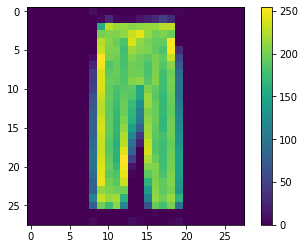

In [45]:
# look at an image - pixels range from 0-255
plt.figure()
plt.imshow(train_images[21])
plt.colorbar()
plt.grid(False)
plt.show()

In [46]:
# process the train and test

train_images = train_images / 255.0

test_images = test_images / 255.0

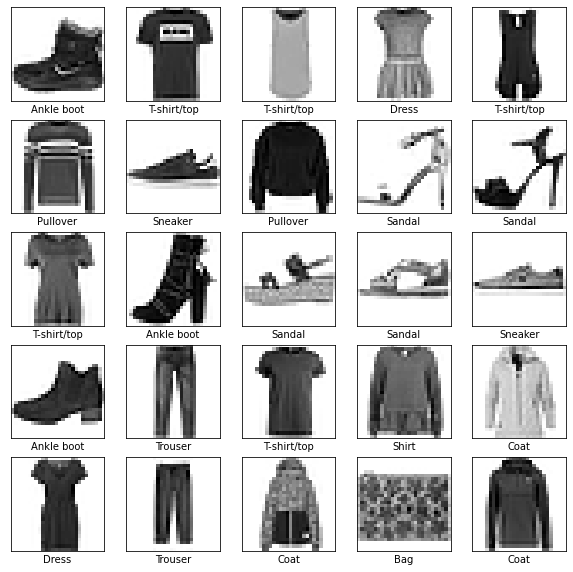

In [47]:
# get the first 25 images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [50]:
# build the model
# 28*28 =784

model = keras.Sequential([
    Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

# compile model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# fit the model
model.fit(train_images, train_labels, epochs=50)

# get results metrics
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

Epoch 1/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4996 - accuracy: 0.8230
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3761 - accuracy: 0.8638
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3341 - accuracy: 0.8777
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3115 - accuracy: 0.8854
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2929 - accuracy: 0.8914
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2809 - accuracy: 0.8967
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2683 - accuracy: 0.9004
Epoch 8/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2564 - accuracy: 0.9042
Epoch 9/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2464 - accuracy: 0.9079
Epoch 10/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.239

In [51]:
# Build Second Model
# 28*28 =784
# adding 5 layers

model = keras.Sequential([
    Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

# compile model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# fit the model
model.fit(train_images, train_labels, epochs=50)

# get results metrics
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

Epoch 1/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5111 - accuracy: 0.8126
Epoch 2/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3789 - accuracy: 0.8617
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3454 - accuracy: 0.8741
Epoch 4/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3248 - accuracy: 0.8812
Epoch 5/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3068 - accuracy: 0.8866
Epoch 6/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2913 - accuracy: 0.8913
Epoch 7/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2802 - accuracy: 0.8958
Epoch 8/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2693 - accuracy: 0.8990
Epoch 9/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2618 - accuracy: 0.9018
Epoch 10/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.252

In [53]:
# mess with hyperameters
# use gridsearch

from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier # wrapper for sckitlearn!

# Function to create model, required for KerasClassifier
def create_model():
    # create model
    model = keras.Sequential([Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)])

    # Compile model
    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    return model

# set X, Y
X = train_images
Y = train_labels


# create model
model = KerasClassifier(build_fn=create_model, verbose=2)

# define the grid search parameters
param_grid = {'batch_size': [10, 20, 40],
              'epochs': [20]}

# Create Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(X, Y)

# Report Results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}")

Epoch 1/20
4800/4800 - 8s - loss: 0.4950 - accuracy: 0.8244
Epoch 2/20
4800/4800 - 10s - loss: 0.3774 - accuracy: 0.8613
Epoch 3/20
4800/4800 - 7s - loss: 0.3405 - accuracy: 0.8747
Epoch 4/20
4800/4800 - 7s - loss: 0.3173 - accuracy: 0.8834
Epoch 5/20
4800/4800 - 7s - loss: 0.2999 - accuracy: 0.8886
Epoch 6/20
4800/4800 - 7s - loss: 0.2847 - accuracy: 0.8943
Epoch 7/20
4800/4800 - 7s - loss: 0.2756 - accuracy: 0.8967
Epoch 8/20
4800/4800 - 7s - loss: 0.2644 - accuracy: 0.9003
Epoch 9/20
4800/4800 - 8s - loss: 0.2540 - accuracy: 0.9055
Epoch 10/20
4800/4800 - 8s - loss: 0.2462 - accuracy: 0.9070
Epoch 11/20
4800/4800 - 7s - loss: 0.2382 - accuracy: 0.9109
Epoch 12/20
4800/4800 - 7s - loss: 0.2319 - accuracy: 0.9132
Epoch 13/20
4800/4800 - 7s - loss: 0.2245 - accuracy: 0.9165
Epoch 14/20
4800/4800 - 8s - loss: 0.2173 - accuracy: 0.9191
Epoch 15/20
4800/4800 - 7s - loss: 0.2140 - accuracy: 0.9192
Epoch 16/20
4800/4800 - 7s - loss: 0.2074 - accuracy: 0.9218
Epoch 17/20
4800/4800 - 7s - los

In [54]:
# mess with new hyperameters - learning rate
# use gridsearch

from tensorflow.keras.optimizers import Adam

# Function to create model
# lr = learning rate
def create_model(lr):
    # create optimizer
    adam = Adam(learning_rate=lr)
    # create model
    model = keras.Sequential([Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)])

    # Compile model
    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    return model

# set X, Y
X = train_images
Y = train_labels


# create model
model = KerasClassifier(build_fn=create_model, verbose=2)

# define the grid search parameters
param_grid = {'lr': [.001, .01], 
              'batch_size': [40], # best batch from above
              'epochs': [20]}

# Create Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(X, Y)

# Report Results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}")

Epoch 1/20
1200/1200 - 2s - loss: 0.5236 - accuracy: 0.8174
Epoch 2/20
1200/1200 - 2s - loss: 0.3930 - accuracy: 0.8585
Epoch 3/20
1200/1200 - 2s - loss: 0.3535 - accuracy: 0.8719
Epoch 4/20
1200/1200 - 2s - loss: 0.3253 - accuracy: 0.8809
Epoch 5/20
1200/1200 - 2s - loss: 0.3029 - accuracy: 0.8889
Epoch 6/20
1200/1200 - 2s - loss: 0.2902 - accuracy: 0.8928
Epoch 7/20
1200/1200 - 2s - loss: 0.2772 - accuracy: 0.8987
Epoch 8/20
1200/1200 - 2s - loss: 0.2669 - accuracy: 0.9009
Epoch 9/20
1200/1200 - 2s - loss: 0.2562 - accuracy: 0.9046
Epoch 10/20
1200/1200 - 2s - loss: 0.2463 - accuracy: 0.9089
Epoch 11/20
1200/1200 - 2s - loss: 0.2407 - accuracy: 0.9110
Epoch 12/20
1200/1200 - 2s - loss: 0.2317 - accuracy: 0.9129
Epoch 13/20
1200/1200 - 2s - loss: 0.2239 - accuracy: 0.9170
Epoch 14/20
1200/1200 - 2s - loss: 0.2184 - accuracy: 0.9190
Epoch 15/20
1200/1200 - 2s - loss: 0.2110 - accuracy: 0.9218
Epoch 16/20
1200/1200 - 2s - loss: 0.2049 - accuracy: 0.9235
Epoch 17/20
1200/1200 - 2s - loss

In [55]:
# mess with new hyperameters - new sigmoid
# use gridsearch

from tensorflow.keras.optimizers import Adam

# Function to create model
# lr = learning rate
def create_model(lr):
    # create optimizer
    adam = Adam(learning_rate=lr)
    # create model
    model = keras.Sequential([Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='sigmoid'),
    keras.layers.Dense(10)])

    # Compile model
    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    return model

# set X, Y
X = train_images
Y = train_labels


# create model
model = KerasClassifier(build_fn=create_model, verbose=2)

# define the grid search parameters
param_grid = {'lr': [.001], # best lr from above 
              'batch_size': [40], # best batch from above
              'epochs': [20]}

# Create Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(X, Y)

# Report Results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}")

Epoch 1/20
1200/1200 - 2s - loss: 0.5855 - accuracy: 0.8031
Epoch 2/20
1200/1200 - 2s - loss: 0.4145 - accuracy: 0.8512
Epoch 3/20
1200/1200 - 2s - loss: 0.3757 - accuracy: 0.8642
Epoch 4/20
1200/1200 - 3s - loss: 0.3524 - accuracy: 0.8724
Epoch 5/20
1200/1200 - 2s - loss: 0.3322 - accuracy: 0.8805
Epoch 6/20
1200/1200 - 2s - loss: 0.3164 - accuracy: 0.8853
Epoch 7/20
1200/1200 - 2s - loss: 0.3019 - accuracy: 0.8910
Epoch 8/20
1200/1200 - 2s - loss: 0.2904 - accuracy: 0.8936
Epoch 9/20
1200/1200 - 2s - loss: 0.2791 - accuracy: 0.8978
Epoch 10/20
1200/1200 - 2s - loss: 0.2697 - accuracy: 0.9013
Epoch 11/20
1200/1200 - 2s - loss: 0.2609 - accuracy: 0.9043
Epoch 12/20
1200/1200 - 2s - loss: 0.2521 - accuracy: 0.9079
Epoch 13/20
1200/1200 - 2s - loss: 0.2442 - accuracy: 0.9100
Epoch 14/20
1200/1200 - 2s - loss: 0.2372 - accuracy: 0.9126
Epoch 15/20
1200/1200 - 2s - loss: 0.2295 - accuracy: 0.9162
Epoch 16/20
1200/1200 - 2s - loss: 0.2233 - accuracy: 0.9182
Epoch 17/20
1200/1200 - 2s - loss

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.